<a href="https://colab.research.google.com/github/WeiHao-19/deep-learning-with-python-notebooks/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.4.3'

## This notebook contains the code samples found in Chapter 3, Section 4 of [Python 深度学习](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 
以下是我对**源码**和**相关命令**理解以及相关解释


### IMDB数据集

- 我们用到的**"IMDB dataset"**, 是在 Internet Movie Database 中一个含有**50,000条highly-polarized reviews**其中**25,000 reviews**是一个 training set ，另外**25,000 reviews**是一个testing set, 每一个set都由50%负面和50%正面的reviews组成。
- 这里解释一下separate training set 和 test set的原因： 这就要追究到我们不会在同一个数据集上测试一个机器学习模型。
训练它，仅仅是因为 一个在它的训练集上表现优异的机器学习模型并不意味着这个模型会在 ***从未见过*** 的数据集上也表现的很好，我们真正的目的是在一个 new data (因为我们通过数据上的label，已经可以较深刻地了解这个训练数据的所有characters了，所以不会傻到弄巧成拙，再用模型预测)。 比如，一个model，它的完成方式可能仅仅只是记住了training samples和their targets的映射关系———实际上对于从未见过的数据的预测就会产生**completely useless**的严重后果。和MNIST dataset一样, IMDB dataset也comes packaged with Keras.已经经过了**预处理**preprocessed:评论sequences of words已经转换为了sequences of integers,其中每一个integer代表字典中的一个specific word。
## 以下是load the dataset的代码 (第一次跑会下载大约80MB的数据):"

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

- 参数 ‘num_words=10000’ 的意思是仅保留训练数据中前 10000 个最常出现的单词。低频单词将被舍弃。这样得到的向量数据不会太大，便于处理。
- train_data 和 test_data 这两个变量都是评论组成的列表，每条评论又是单词索引组成
的列表（表示一系列单词）。train_labels 和 test_labels 都是 0 和 1 组成的列表，其中 0代表负面（negative），1 代表正面（positive）。

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])


9999

由于限定为前10000个最常见的单词，单词索引都不会超过10000。


In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


这里附上对上面几行代码注释的理解：第一行‘word_index = ’很巧妙地把imdb中**单词index**映射为**整数index**；第二行的**键值颠倒（reverse_word_index）**是一个熟练的技巧，键值颠倒，将整数索引映射为单词；第三行，将评论解码。注意，索引减去了 3，因为 0、1、2是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引。

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

拉片（解码）出来看一看hh

不能将整数序列直接输入神经网络。数据预处理这一步还需要**将列表转换为张量**。转换方法有以下两种。
- 填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)
的整数张量，然后网络第一层使用能处理这种整数张量的层（即Embedding层）。
- 对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会被转换为 10 000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。然后网络第一层可以用 Dense 层，它能够处理浮点数向量数据。
下面是one-hot(也叫独热编码)将数据向量化。以下是手动实现方法：

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

第一步，‘def’创建一个形状为(len(sequences),dimension) 的零矩阵；第二步将 results[i] 的指定索引设为 1；后面展示了选择向量化前后的结果

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.6086 - binary_accuracy: 0.6741 - val_loss: 0.4097 - val_binary_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3458 - binary_accuracy: 0.8974 - val_loss: 0.3324 - val_binary_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2401 - binary_accuracy: 0.9289 - val_loss: 0.2981 - val_binary_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1896 - binary_accuracy: 0.9413 - val_loss: 0.2871 - val_binary_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1522 - binary_accuracy: 0.9538 - val_loss: 0.2754 - val_binary_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1215 - binary_accuracy: 0.9658 - val_loss: 0.2840 - val_binary_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - los

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

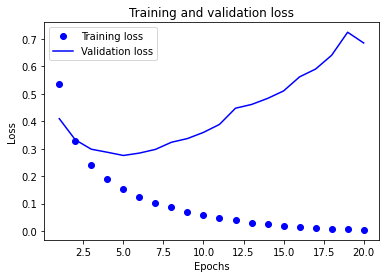

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

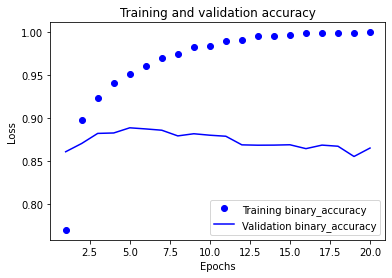

In [35]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training binary_accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5476 - accuracy: 0.7448
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2757 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2068 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2933 - accuracy: 0.8830


In [37]:
results

[0.29328131675720215, 0.8830000162124634]

In [38]:
model.predict(x_test)

array([[0.26440954],
       [0.9992329 ],
       [0.9347076 ],
       ...,
       [0.17816293],
       [0.12499028],
       [0.7750415 ]], dtype=float32)